# Tabla de Contenidos:

### 1. Introducción
- Informacion acerca de la base de datos

### 2. Librerias
- Importar Librerias
- Importar Dataset

### 3. Conociendo la data
- Explorando los tipos de datos
- Forma de los datos
- Valores Nulos
- Valores Unicos
- Las primeras filas de nuestro dataset
- Filtrando las columnas que usaremos

### 4. Explorando algunas variables
- Trazado de alguna información gráfica y descriptiva.

# 1. Introducción:

La base de datos original contiene 576 registros con 18 atributos. En esta base de datos cada registro representa las características de un compuesto $ABX_3$, los cuales fueron clasificados experimentalmente como perovskita o no-perovskita de acuerdo al campo *exp_label*

La base de datos se basa en el artículo: **New tolerance factor to predict the stability of perovskite oxides and halides** (https://www.science.org/doi/10.1126/sciadv.aav0693)

### Contenido
La base de datos incluye 17 campos en total, existen campos adicionales que son resultados de las conclusiones obtenidas de dicho artículo\
\
Los campos que nececitamos son los siguientes:

| Campo | Descripción |
| ----- | --- |
| **ABX3** | Compuesto $ABX_3$ |
|**exp_label** | Clasificación experimental como perovskita o no-perovskita |
|**A** | Átomo en el sitio A |
|**B** | Átomo en el sitio B |
|**X** | Átomo en el sitio X |
|**nA** | Estado de oxidación del átomo en el sitio A |
|**nB** | Estado de oxidación del átomo en el sitio B |
|**nX** | Estado de oxidación del átomo en el sitio X |
|**rA (Ang)** | Radio iónico del átomo en el sitio A |
|**rB (Ang)** | Radio iónico del átomo en el sitio B |
|**rX (Ang)** | Radio iónico del átomo en el sitio X |
|**t** | Factor de tolerancia de Goldschmidt |
|**t_pred** | Indicadora si el compuesto $ABX_3$ es perovskita o no-perovskita según el valor de $t$ |

\
\
Descartaremos algunos campos que son resultado de la investigación del artículo, esos campos son:

| Campo | Descripción |
| ----- | --- |
|**is_train** | Indicadora si el registro es utilizado como dato de entrenamiento |
|**tau** | Nuevo factor de tolerancia $τ$ |
|**tau_pred** | Indicadora si el compuesto $ABX_3$ es perovskita o no-perovskita según el valor de $τ$ |
|**tau_prob** | Probabilidad de que el compuesto $ABX_3$ sea clasificado como perovskita según el factor de tolerancia $τ$ |



## 2. Librerias:
* Importando Librerias
* Importando Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn

In [2]:
df = pd.read_csv('/content/Base_1_Perovskitas.csv',sep=',')

## 3. Conociendo la data:
* Explorando los tipos de datos
* Forma de los datos
* Valores Nulos
* Valores Unicos
* Las primeras filas de nuestro dataset
* Filtrando las columnas que usaremos

In [3]:
#Buscando faltantes, tipo de datos y la forma de los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABX3       576 non-null    object 
 1   exp_label  576 non-null    float64
 2   is_train   576 non-null    int64  
 3   A          576 non-null    object 
 4   B          576 non-null    object 
 5   X          576 non-null    object 
 6   nA         576 non-null    int64  
 7   nB         576 non-null    int64  
 8   nX         576 non-null    int64  
 9   rA (Ang)   576 non-null    float64
 10  rB (Ang)   576 non-null    float64
 11  rX (Ang)   576 non-null    float64
 12  t          576 non-null    float64
 13  tau        576 non-null    float64
 14  t_pred     576 non-null    int64  
 15  tau_pred   576 non-null    int64  
 16  tau_prob   576 non-null    float64
dtypes: float64(7), int64(6), object(4)
memory usage: 76.6+ KB
None


In [4]:
#Valores únicos por columnas
print(df.nunique())

ABX3         576
exp_label      2
is_train       2
A             49
B             67
X              5
nA             5
nB             5
nX             2
rA (Ang)      45
rB (Ang)      54
rX (Ang)       5
t             62
tau          327
t_pred         2
tau_pred       2
tau_prob      98
dtype: int64


In [5]:
#Explorando los datos
df.head()

,ABX3,exp_label,is_train,A,B,X,nA,nB,nX,rA (Ang),rB (Ang),rX (Ang),t,tau,t_pred,tau_pred,tau_prob
0,AgBrO3,-1.0,1,Ag,Br,O,1,5,-2,1.28,0.31,1.40,1.11,6.43,-1,-1,0.05
1,AgCdBr3,-1.0,1,Ag,Cd,Br,1,2,-1,1.28,0.95,1.96,0.79,5.58,-1,-1,0.12
2,PbAgBr3,-1.0,1,Pb,Ag,Br,2,1,-1,1.49,1.15,1.96,0.78,7.71,-1,-1,0.01
3,AgCaCl3,-1.0,1,Ag,Ca,Cl,1,2,-1,1.28,1.00,1.81,0.78,6.00,-1,-1,0.07
4,AgClO3,-1.0,1,Ag,Cl,O,1,5,-2,1.28,0.12,1.40,1.25,15.17,-1,-1,0.00


In [6]:
#Filtramos las columnas que necesitamos
df = df[['ABX3','exp_label','A','B','X','nA','nB','nX','rA (Ang)','rB (Ang)','rX (Ang)','t','t_pred']]

In [7]:
df.head()

,ABX3,exp_label,A,B,X,nA,nB,nX,rA (Ang),rB (Ang),rX (Ang),t,t_pred
0,AgBrO3,-1.0,Ag,Br,O,1,5,-2,1.28,0.31,1.40,1.11,-1
1,AgCdBr3,-1.0,Ag,Cd,Br,1,2,-1,1.28,0.95,1.96,0.79,-1
2,PbAgBr3,-1.0,Pb,Ag,Br,2,1,-1,1.49,1.15,1.96,0.78,-1
3,AgCaCl3,-1.0,Ag,Ca,Cl,1,2,-1,1.28,1.00,1.81,0.78,-1
4,AgClO3,-1.0,Ag,Cl,O,1,5,-2,1.28,0.12,1.40,1.25,-1


## 4. Explorando algunas variables
Trazado de alguna información gráfica y descriptiva.

/tmp/ipython-input-10-1392206687.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


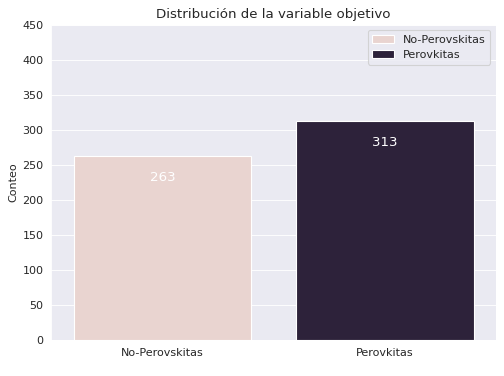

In [10]:
%matplotlib inline

sns.set_style("darkgrid")
sns.set_palette("bright")

ax = plt.figure(dpi=80)
ax = sns.countplot(data=df,x = 'exp_label',hue='exp_label',dodge=False)

for p in ax.patches:
    ax.annotate(f'\n{int(p.get_height())}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=12)

labels = ['No-Perovskitas','Perovkitas']
ax.set_xticklabels(labels)

plt.title('Distribución de la variable objetivo')
plt.xlabel('')
plt.ylabel('Conteo')
plt.ylim(0,450)
legends = ['No-Perovskitas','Perovkitas']
plt.legend(legends,loc='best')
plt.tight_layout()
plt.show()

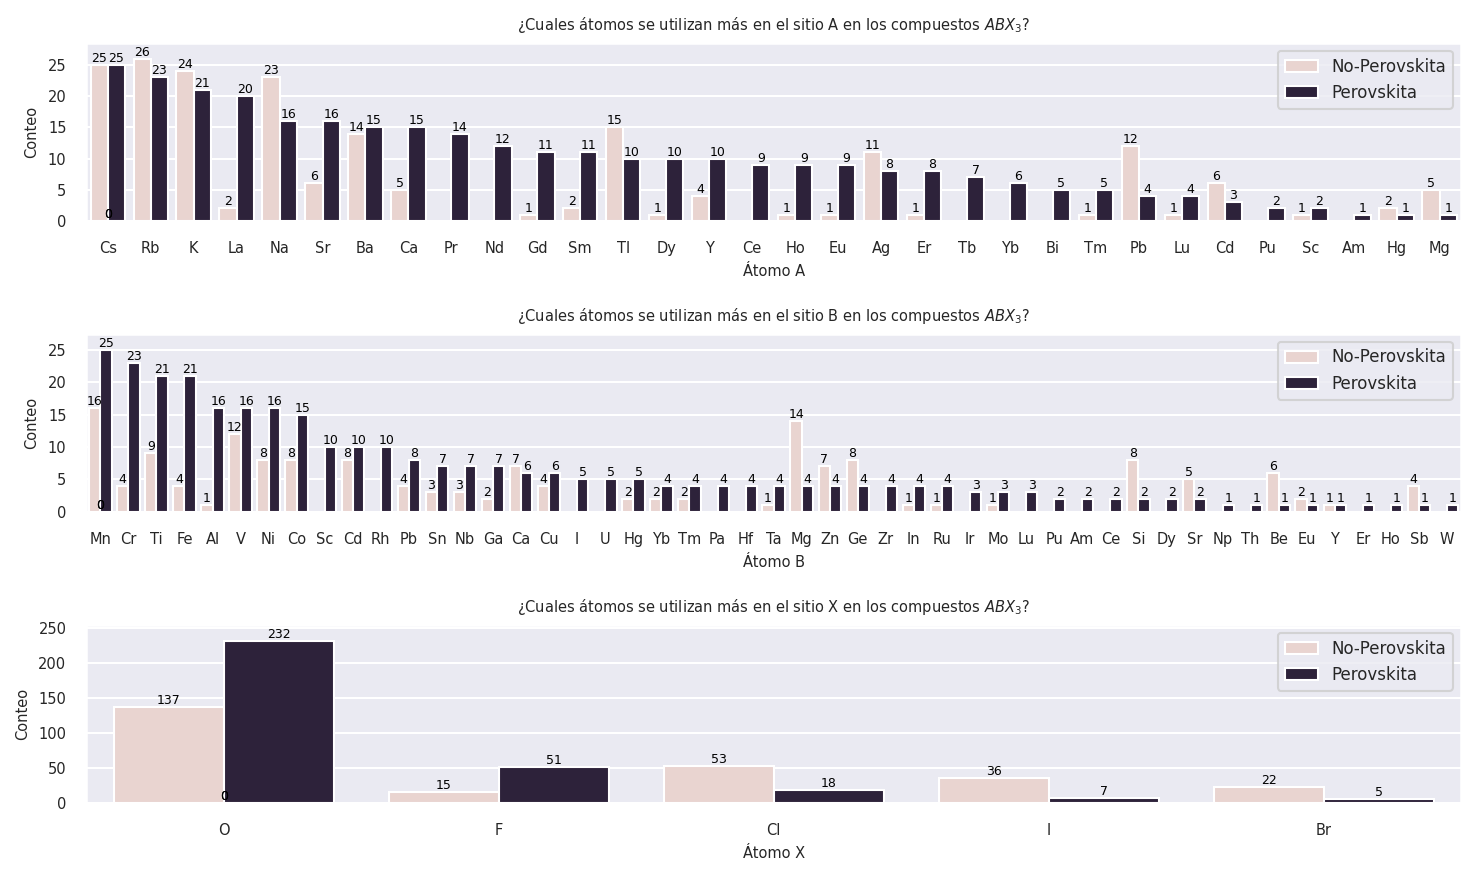

In [11]:
# Configura el estilo y la paleta de colores
sns.set(style="darkgrid", palette="bright")

# Crea una figura con tres subplots
fig, axs = plt.subplots(nrows=3, figsize=(10,6), dpi=150)

# Genera los tres countplots y agrega anotaciones
for i, col in enumerate(['A', 'B', 'X']):
    order = df[df['exp_label'] == 1][col].value_counts().index
    sns.countplot(data=df, x=col, ax=axs[i], order=order, hue='exp_label')
    for p in axs[i].patches:
        axs[i].text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                    fontsize=6, color='black', ha='center', va='bottom')

    # Obtener el valor máximo de las barras
    max_bar = max([p.get_height() for p in axs[i].patches])

    # Establecer el límite superior en el eje y
    axs[i].set_ylim([0, max_bar*1.1])

    # Modificar la leyenda
    axs[i].legend(labels=["No-Perovskita", "Perovskita"], fontsize=8)

    # Modificar el xlabel y ylabel
    axs[i].set_ylabel("Conteo", fontsize=7)
    axs[i].set_xlabel("Átomo " + str(col), fontsize=7)

    # Modificar el tamaño de los ticks en los ejes x e y
    axs[i].tick_params(axis='x', labelsize=7)
    axs[i].tick_params(axis='y', labelsize=7)

    # Agregar título al subplot
    axs[i].set_title("¿Cuales átomos se utilizan más en el sitio " + str(col) + ' en los compuestos $ABX_3$?', fontsize= 7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

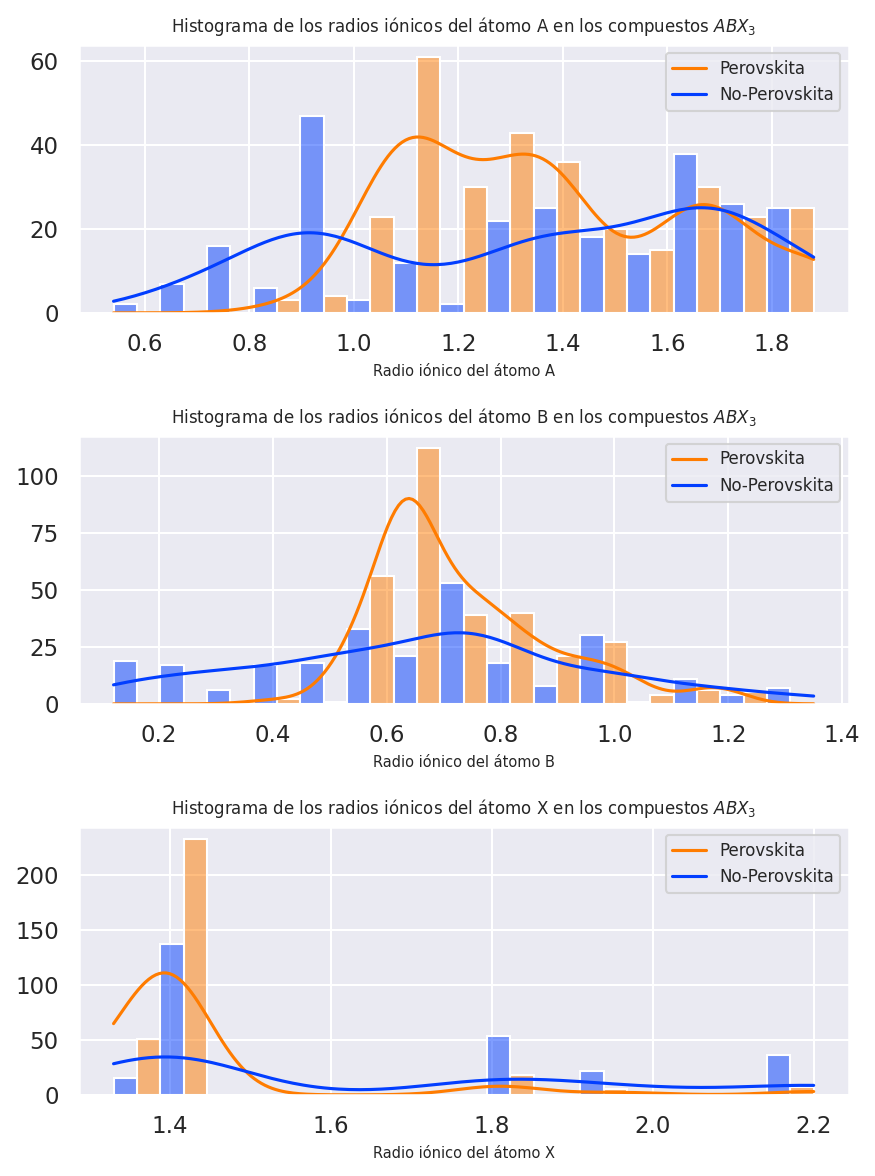

In [12]:
# Configura el estilo y la paleta de colores
sns.set(style="darkgrid", palette="bright")

# Crea una figura con tres subplots
fig, axs = plt.subplots(nrows=3, figsize=(6,8), dpi=150)

# Genera los tres histogramas y agrega anotaciones
for i, col in enumerate(['rA (Ang)', 'rB (Ang)', 'rX (Ang)']):
    sns.histplot(data=df, x=col, hue='exp_label', ax=axs[i], bins=15, multiple='dodge', palette="bright", kde=True)

    # Modificar la leyenda
    axs[i].legend(labels=["Perovskita", "No-Perovskita"], fontsize=8)

    # Modificar ylabel y xlabel
    axs[i].set_ylabel("")
    axs[i].set_xlabel("Radio iónico del átomo " + str(col[1:2]),fontsize=7)

    # Agregar título al subplot
    axs[i].set_title("Histograma de los radios iónicos del átomo " + str(col[1:2]) + ' en los compuestos $ABX_3$', fontsize = 8)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


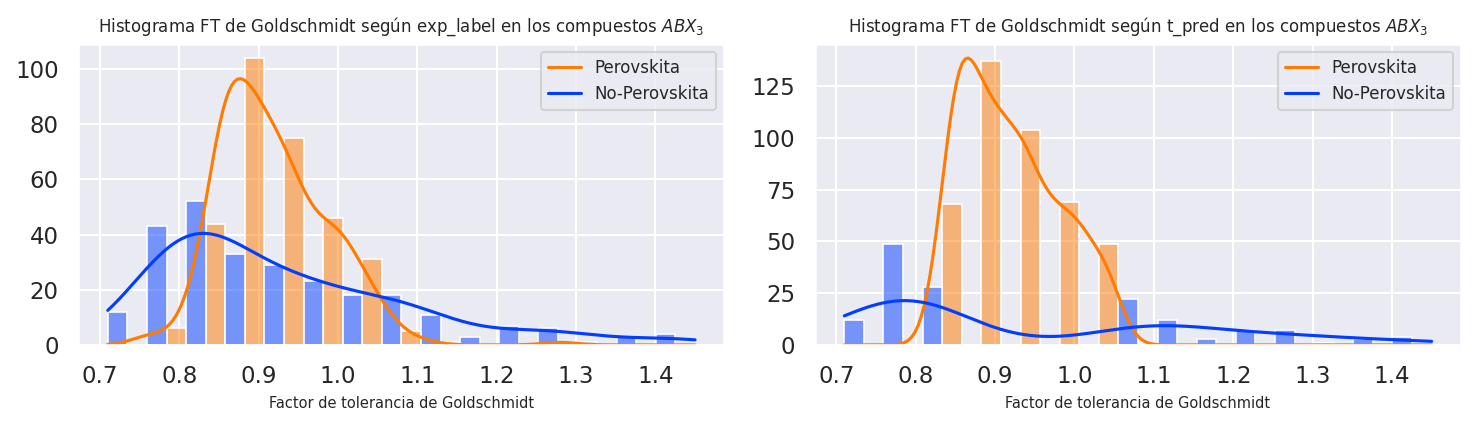

In [13]:
# Configura el estilo y la paleta de colores
sns.set(style="darkgrid", palette="bright")

# Crea una figura con tres subplots
fig, axs = plt.subplots(ncols=2, figsize=(10,3), dpi=150)

# Genera los tres histogramas y agrega anotaciones
for i, col in enumerate(['exp_label', 't_pred']):
    sns.histplot(data=df, x='t', hue=col, ax=axs[i], bins=15, multiple='dodge', palette="bright", kde=True)

    # Modificar la leyenda
    axs[i].legend(labels=["Perovskita", "No-Perovskita"], fontsize=8)

    # Modificar ylabel y xlabel
    axs[i].set_ylabel("")
    axs[i].set_xlabel('Factor de tolerancia de Goldschmidt', fontsize=7)

    # Agregar título al subplot
    axs[i].set_title("Histograma FT de Goldschmidt según " + str(col) + ' en los compuestos $ABX_3$', fontsize = 8)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

/tmp/ipython-input-14-2681140311.py:3: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=1`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = sns.violinplot(data=df, x="X", y="t", hue='t_pred', split=True, inner='quartile', bw=1)


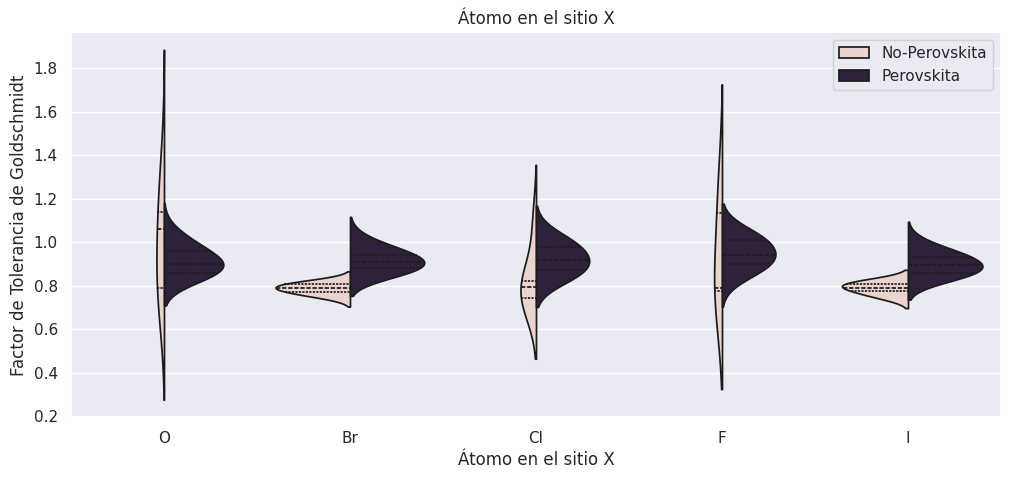

In [14]:
plt.figure(dpi=100, figsize=(12,5))

ax = sns.violinplot(data=df, x="X", y="t", hue='t_pred', split=True, inner='quartile', bw=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['No-Perovskita','Perovskita'],loc="upper right")
plt.ylabel('Factor de Tolerancia de Goldschmidt')
plt.xlabel('Átomo en el sitio X')
plt.title('Átomo en el sitio X')
plt.show()

# Implementación del modelo de KNN

In [15]:
!pyhton --version

/bin/bash: line 1: pyhton: command not found


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

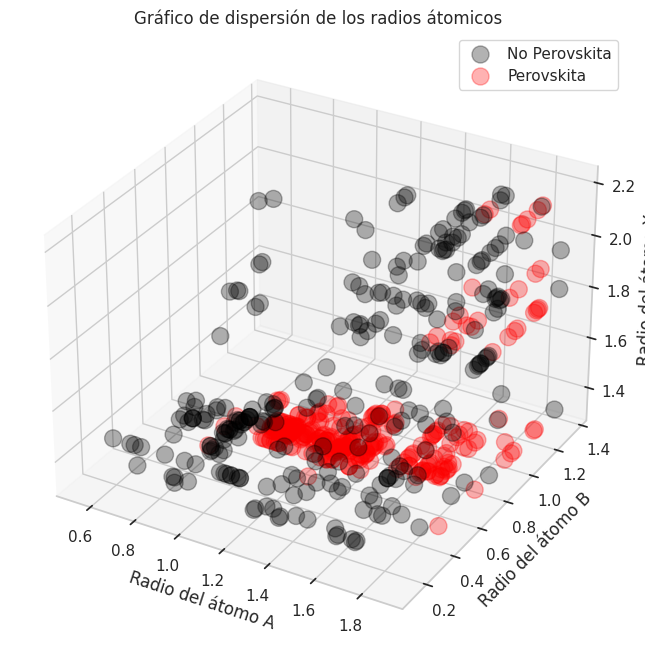

In [17]:
#ABX3	exp_label	A	B	X	nA	nB	nX	rA (Ang)	rB (Ang)	rX (Ang)	t	t_pred

sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter(xs=df[df["exp_label"] == -1]["rA (Ang)"],
           ys=df[df["exp_label"] == -1]["rB (Ang)"],
           zs=df[df["exp_label"] == -1]["rX (Ang)"],
           c="black",s=150,alpha=0.3,label="No Perovskita")

ax.scatter(xs=df[df["exp_label"]==1]["rA (Ang)"],
           ys=df[df["exp_label"]==1]["rB (Ang)"],
           zs=df[df["exp_label"]==1]["rX (Ang)"],
           c="red",s=150,alpha=0.3,label="Perovskita")

plt.title("Gráfico de dispersión de los radios átomicos")
ax.set_xlabel("Radio del átomo A")
ax.set_ylabel("Radio del átomo B")
ax.set_zlabel("Radio del átomo X")
ax.legend()
plt.show()



# plt.figure(figsize=(8,4))
# sns.scatterplot(x="rA",y="rX",data=temp,hue="target",palette="viridis",s=150,alpha=0.3)
# plt.title("Gráfico de dispersión de los radios iónicos (Vista Lateral)")
# plt.xlabel("Radio iónico átomo A")
# plt.ylabel("Radio iónico átomo X")

In [18]:
X = df[["rA (Ang)","rB (Ang)","rX (Ang)"]]
y = df["exp_label"]

X_train, X_test, y_train ,y_test = train_test_split(X,y,random_state=101,test_size=0.20)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

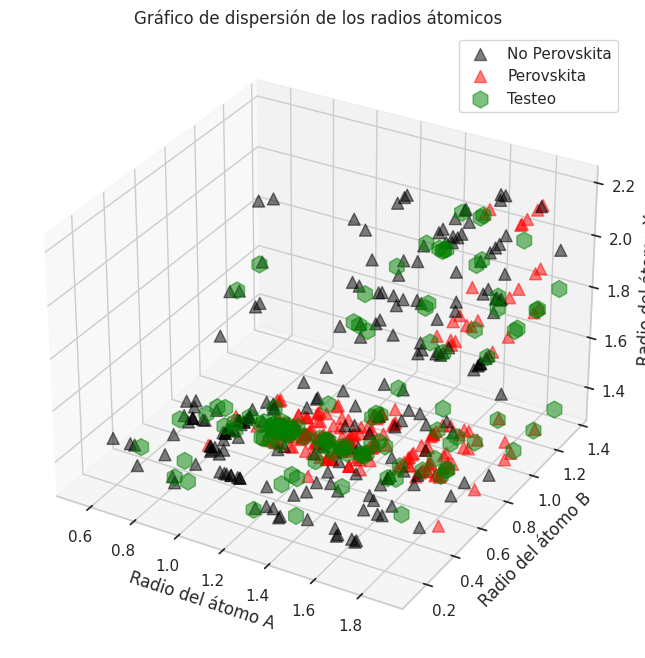

In [19]:
train = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
test = pd.concat([X_test.reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter(xs=train[train["exp_label"] == -1]["rA (Ang)"],
           ys=train[train["exp_label"] == -1]["rB (Ang)"],
           zs=train[train["exp_label"] == -1]["rX (Ang)"],
           c="black",s=75,alpha=0.5,label="No Perovskita",marker='^')

ax.scatter(xs=train[train["exp_label"]==1]["rA (Ang)"],
           ys=train[train["exp_label"]==1]["rB (Ang)"],
           zs=train[train["exp_label"]==1]["rX (Ang)"],
           c="red",s=75,alpha=0.5,label="Perovskita",marker='^')

ax.scatter(xs=test["rA (Ang)"],
           ys=test["rB (Ang)"],
           zs=test["rX (Ang)"],
           c="green",s=150,alpha=0.5,label="Testeo",marker='h')

anglex = 50
angley = 70
anglez = 90

plt.title("Gráfico de dispersión de los radios átomicos")
ax.set_xlabel("Radio del átomo A",rotation=anglex)
ax.set_ylabel("Radio del átomo B",rotation=angley)
ax.set_zlabel("Radio del átomo X",rotation=anglez)
ax.legend()
plt.show()


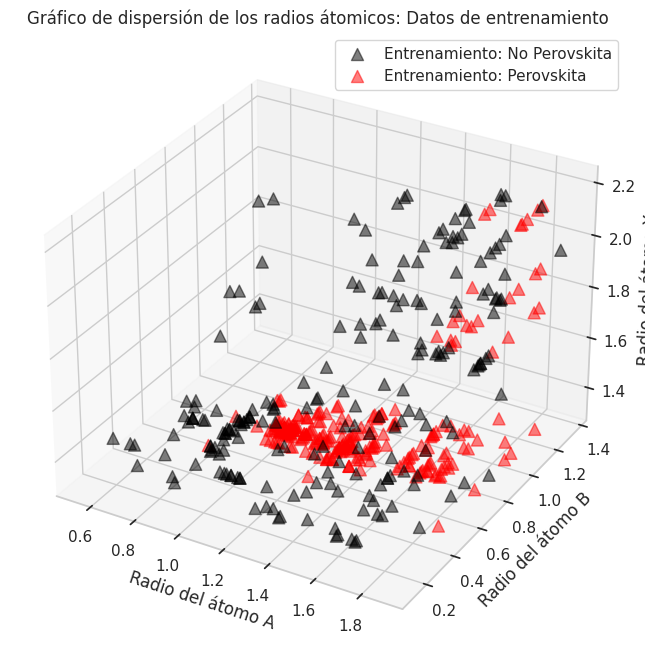

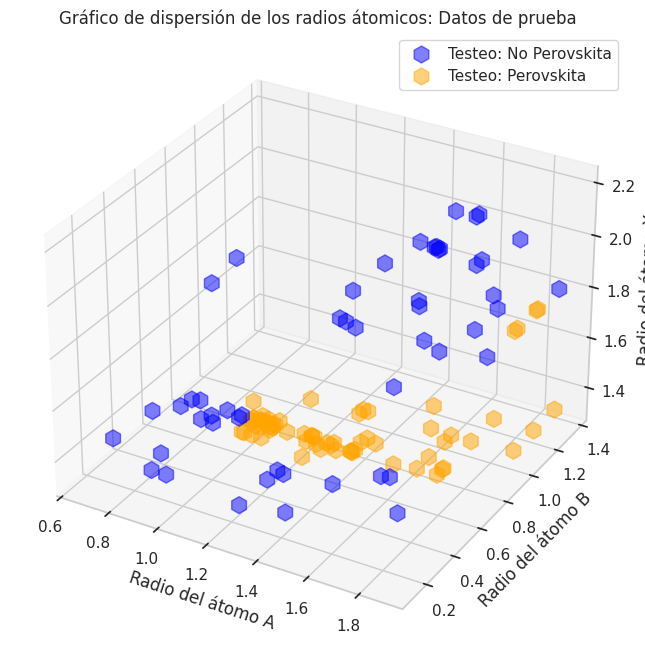

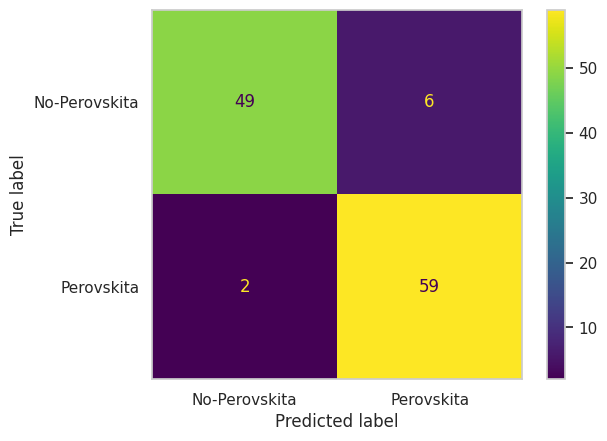

              precision    recall  f1-score   support

        -1.0       0.96      0.89      0.92        55
         1.0       0.91      0.97      0.94        61

    accuracy                           0.93       116
   macro avg       0.93      0.93      0.93       116
weighted avg       0.93      0.93      0.93       116



In [20]:
X = df[["rA (Ang)","rB (Ang)","rX (Ang)"]]
y = df["exp_label"]

X_train, X_test, y_train ,y_test = train_test_split(X,y,random_state=101,test_size=0.20)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15,metric="euclidean")
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

train = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
test = pd.concat([X_test.reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)
pred = pd.concat([X_test.reset_index(drop=True), pd.DataFrame(y_pred,columns=['exp_label']).reset_index(drop=True)], axis=1)

sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter(xs=train[train["exp_label"] == -1]["rA (Ang)"],
           ys=train[train["exp_label"] == -1]["rB (Ang)"],
           zs=train[train["exp_label"] == -1]["rX (Ang)"],
           c="black",s=75,alpha=0.5,label="Entrenamiento: No Perovskita",marker='^')

ax.scatter(xs=train[train["exp_label"]==1]["rA (Ang)"],
           ys=train[train["exp_label"]==1]["rB (Ang)"],
           zs=train[train["exp_label"]==1]["rX (Ang)"],
           c="red",s=75,alpha=0.5,label="Entrenamiento: Perovskita",marker='^')

plt.title("Gráfico de dispersión de los radios átomicos: Datos de entrenamiento")
ax.set_xlabel("Radio del átomo A")
ax.set_ylabel("Radio del átomo B")
ax.set_zlabel("Radio del átomo X")
ax.legend()
plt.show()


#########################

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter(xs=pred[pred["exp_label"] == -1]["rA (Ang)"],
           ys=pred[pred["exp_label"] == -1]["rB (Ang)"],
           zs=pred[pred["exp_label"] == -1]["rX (Ang)"],
           c="blue",s=150,alpha=0.5,label="Testeo: No Perovskita",marker='h')

ax.scatter(xs=pred[pred["exp_label"] == 1]["rA (Ang)"],
           ys=pred[pred["exp_label"] == 1]["rB (Ang)"],
           zs=pred[pred["exp_label"] == 1]["rX (Ang)"],
           c="orange",s=150,alpha=0.5,label="Testeo: Perovskita",marker='h')

plt.title("Gráfico de dispersión de los radios átomicos: Datos de prueba")
ax.set_xlabel("Radio del átomo A")
ax.set_ylabel("Radio del átomo B")
ax.set_zlabel("Radio del átomo X")
ax.legend()
plt.show()



cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No-Perovskita","Perovskita"])
disp.plot()
plt.grid(False)
plt.show()



print(classification_report(y_test,y_pred))

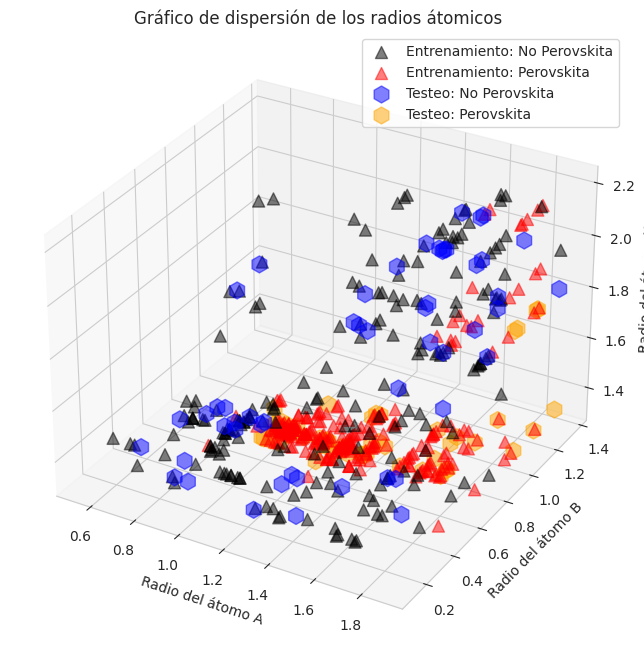

In [ ]:
X = df[["rA (Ang)","rB (Ang)","rX (Ang)"]]
y = df["exp_label"]

X_train, X_test, y_train ,y_test = train_test_split(X,y,random_state=101,test_size=0.20)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=14,metric="euclidean")
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

train = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
test = pd.concat([X_test.reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)
pred = pd.concat([X_test.reset_index(drop=True), pd.DataFrame(y_pred,columns=['exp_label']).reset_index(drop=True)], axis=1)

sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter(xs=train[train["exp_label"] == -1]["rA (Ang)"],
           ys=train[train["exp_label"] == -1]["rB (Ang)"],
           zs=train[train["exp_label"] == -1]["rX (Ang)"],
           c="black",s=75,alpha=0.5,label="Entrenamiento: No Perovskita",marker='^')

ax.scatter(xs=train[train["exp_label"]==1]["rA (Ang)"],
           ys=train[train["exp_label"]==1]["rB (Ang)"],
           zs=train[train["exp_label"]==1]["rX (Ang)"],
           c="red",s=75,alpha=0.5,label="Entrenamiento: Perovskita",marker='^')

ax.scatter(xs=pred[pred["exp_label"] == -1]["rA (Ang)"],
           ys=pred[pred["exp_label"] == -1]["rB (Ang)"],
           zs=pred[pred["exp_label"] == -1]["rX (Ang)"],
           c="blue",s=150,alpha=0.5,label="Testeo: No Perovskita",marker='h')

ax.scatter(xs=pred[pred["exp_label"] == 1]["rA (Ang)"],
           ys=pred[pred["exp_label"] == 1]["rB (Ang)"],
           zs=pred[pred["exp_label"] == 1]["rX (Ang)"],
           c="orange",s=150,alpha=0.5,label="Testeo: Perovskita",marker='h')


anglex = 50
angley = 70
anglez = 90

plt.title("Gráfico de dispersión de los radios átomicos")
ax.set_xlabel("Radio del átomo A",rotation=anglex)
ax.set_ylabel("Radio del átomo B",rotation=angley)
ax.set_zlabel("Radio del átomo X",rotation=anglez)
ax.legend()
plt.show()

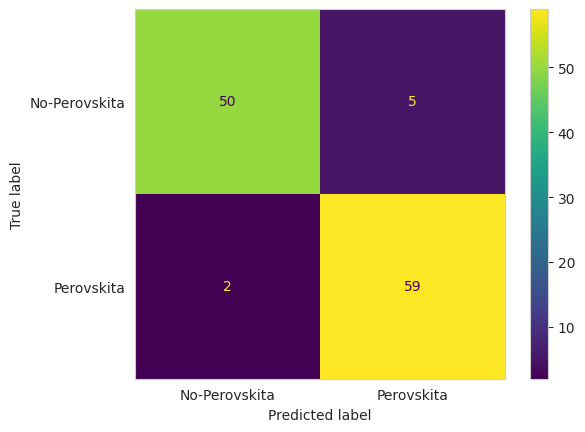

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No-Perovskita","Perovskita"])
disp.plot()
plt.grid(False)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.96      0.86      0.91        56
           1       0.89      0.97      0.93        65

    accuracy                           0.92       121
   macro avg       0.92      0.91      0.92       121
weighted avg       0.92      0.92      0.92       121



In [ ]:
test_error_rates = []

for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train_scaled,y_train)

    y_pred_test = knn.predict(X_test_scaled)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

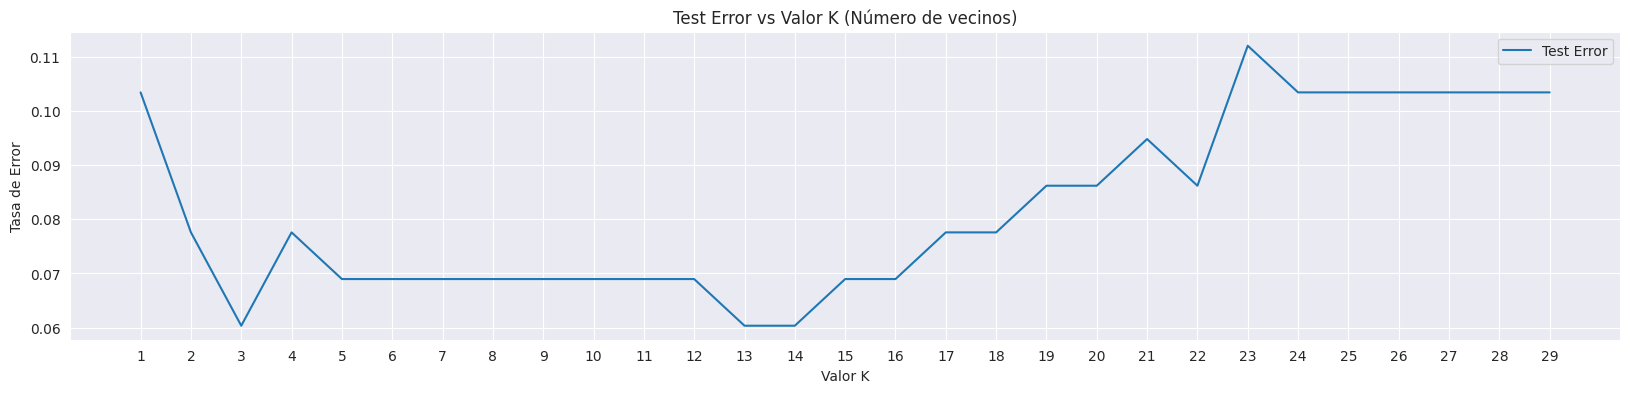

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,4))
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Tasa de Error')
plt.xlabel("Valor K")
plt.title("Test Error vs Valor K (Número de vecinos)")
plt.savefig("Test Error")
plt.xticks(ticks=range(1,30),labels=list(range(1,30)))
plt.show()

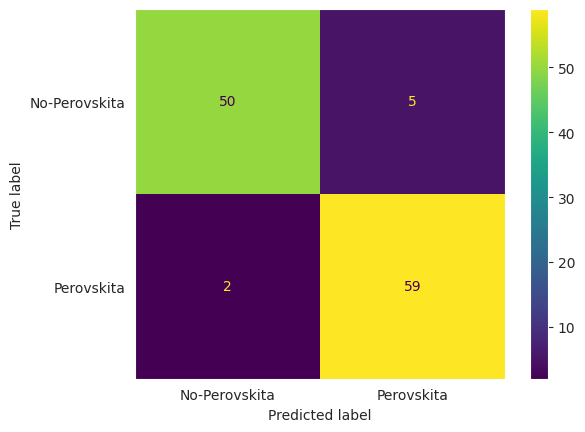

              precision    recall  f1-score   support

          -1       0.96      0.91      0.93        55
           1       0.92      0.97      0.94        61

    accuracy                           0.94       116
   macro avg       0.94      0.94      0.94       116
weighted avg       0.94      0.94      0.94       116



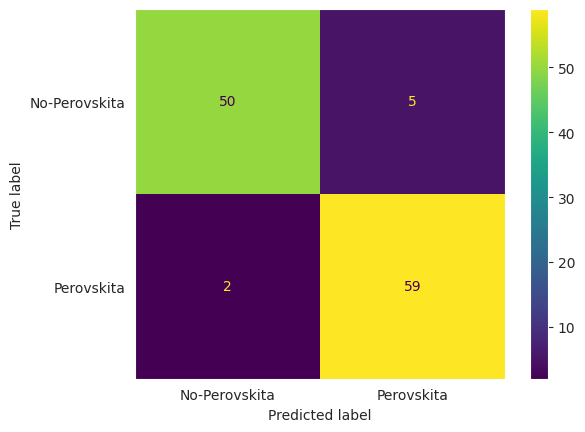

              precision    recall  f1-score   support

          -1       0.96      0.91      0.93        55
           1       0.92      0.97      0.94        61

    accuracy                           0.94       116
   macro avg       0.94      0.94      0.94       116
weighted avg       0.94      0.94      0.94       116



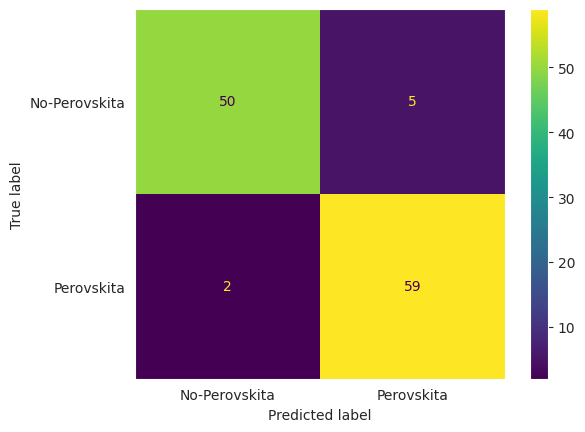

              precision    recall  f1-score   support

          -1       0.96      0.91      0.93        55
           1       0.92      0.97      0.94        61

    accuracy                           0.94       116
   macro avg       0.94      0.94      0.94       116
weighted avg       0.94      0.94      0.94       116



In [ ]:
vecinos = [3,13,14]

for k in vecinos:
  knn = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["No-Perovskita","Perovskita"])
  disp.plot()
  plt.grid(False)
  plt.show()
  print(classification_report(y_test,y_pred))

# Datos Desconocidos

In [ ]:
df_moleculas = pd.read_csv('/content/Base_2_Perovskitas.csv',sep=',')
df_moleculas

,A,B,X,rA,rB,rX,t,target
0,Ammonium,Be,F,146,45.0,128.5,1.119,0
1,Hydroxylammonium,Be,F,216,45.0,128.5,1.404,0
2,Methylammonium,Be,F,217,45.0,128.5,1.408,0
3,Hydrazinium,Be,F,217,45.0,128.5,1.408,0
4,Azetidinium,Be,F,250,45.0,128.5,1.543,0
...,...,...,...,...,...,...,...,...
1171,Ethylammonium,Yb,I,274,102.0,220.0,1.085,0
1172,Guanidinium,Yb,I,278,102.0,220.0,1.094,0
1173,Tetramethylammoium,Yb,I,292,102.0,220.0,1.124,0
1174,Thiazolium,Yb,I,320,102.0,220.0,1.186,0


In [ ]:
df_moleculas["A"].unique()

array(['Ammonium', 'Hydroxylammonium', 'Methylammonium', 'Hydrazinium',
       'Azetidinium', 'Formamidinium', 'Imidazolium', 'Dimethylammonium',
       'Pyrrolinium', 'Ethylammonium', 'Guanidinium',
       'Tetramethylammoium', 'Thiazolium', 'Tropylium'], dtype=object)

In [ ]:
df_moleculas[["rA","rB","rX"]] = df_moleculas[["rA","rB","rX"]]/100

In [ ]:
df,df_moleculas

(        ABX3  exp_label  is_train   A   B   X  nA  nB  nX  rA (Ang)  rB (Ang)  \
 0     AgBrO3         -1         1  Ag  Br   O   1   5  -2      1.28      0.31   
 1    AgCdBr3         -1         1  Ag  Cd  Br   1   2  -1      1.28      0.95   
 2    PbAgBr3         -1         1  Pb  Ag  Br   2   1  -1      1.49      1.15   
 3    AgCaCl3         -1         1  Ag  Ca  Cl   1   2  -1      1.28      1.00   
 4     AgClO3         -1         1  Ag  Cl   O   1   5  -2      1.28      0.12   
 ..       ...        ...       ...  ..  ..  ..  ..  ..  ..       ...       ...   
 571    RbUO3          1        -1  Rb   U   O   1   5  -2      1.72      0.76   
 572   SmTiO3          1        -1  Sm  Ti   O   3   3  -2      1.24      0.67   
 573   SrTeO3         -1        -1  Sr  Te   O   2   4  -2      1.44      0.97   
 574   SrTiO3          1        -1  Sr  Ti   O   2   4  -2      1.44      0.60   
 575    YTmO3         -1        -1   Y  Tm   O   3   3  -2      1.08      0.88   
 
      rX (Ang)

In [ ]:
df_moleculas["A"].unique(),df_moleculas["B"].unique(),df_moleculas["X"].unique()

(array(['Ammonium', 'Hydroxylammonium', 'Methylammonium', 'Hydrazinium',
        'Azetidinium', 'Formamidinium', 'Imidazolium', 'Dimethylammonium',
        'Pyrrolinium', 'Ethylammonium', 'Guanidinium',
        'Tetramethylammoium', 'Thiazolium', 'Tropylium'], dtype=object),
 array(['Be', 'Mg', 'Ca', 'Sr', 'Ba', 'Mn', 'Fe', 'Co', 'Ni', 'Pd', 'Pt',
        'Cu', 'Zn', 'Cd', 'Hg', 'Ge', 'Sn', 'Pb', 'Eu', 'Tm', 'Yb'],
       dtype=object),
 array(['F', 'Cl', 'Br', 'I'], dtype=object))

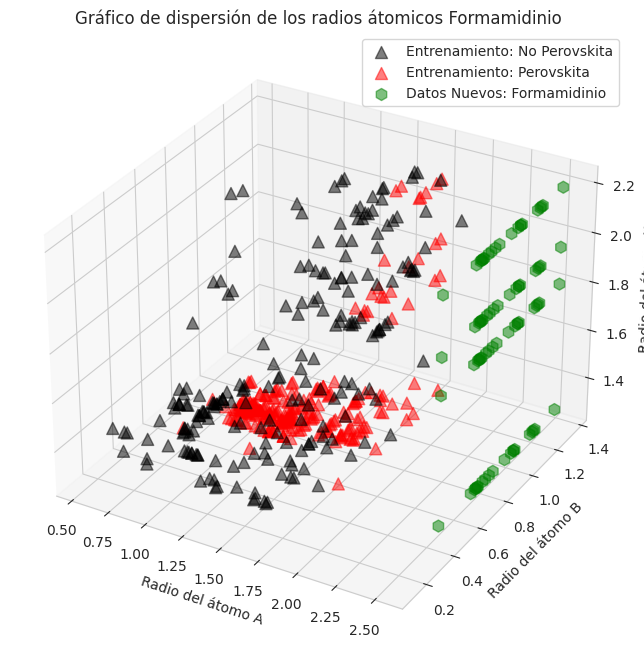

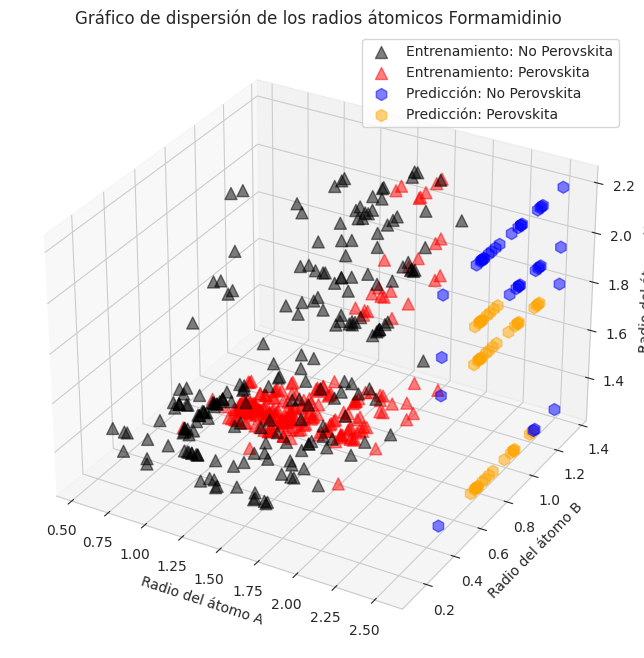

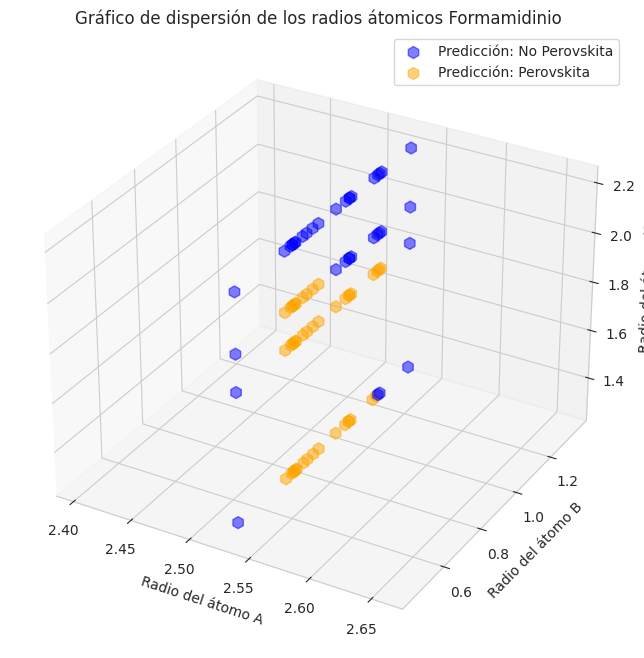

In [ ]:
X = df[["rA (Ang)","rB (Ang)","rX (Ang)"]]
y = df["exp_label"]

X_train, X_test, y_train ,y_test = train_test_split(X,y,random_state=101,test_size=0.20)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_moleculas_scaled = scaler.fit_transform(df_moleculas[df_moleculas["A"] == "Formamidinium"][['rA','rB','rX']])

knn = KNeighborsClassifier(n_neighbors=13,metric="euclidean")
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_moleculas_scaled)
y_pred_proba = knn.predict_proba(X_moleculas_scaled)


train = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
pred = pd.concat([df_moleculas[df_moleculas["A"] == "Formamidinium"][['rA','rB','rX']].reset_index(drop=True), pd.DataFrame(y_pred,columns=['exp_label']).reset_index(drop=True)], axis=1)

sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter(xs=train[train["exp_label"] == -1]["rA (Ang)"],
           ys=train[train["exp_label"] == -1]["rB (Ang)"],
           zs=train[train["exp_label"] == -1]["rX (Ang)"],
           c="black",s=75,alpha=0.5,label="Entrenamiento: No Perovskita",marker='^')

ax.scatter(xs=train[train["exp_label"]==1]["rA (Ang)"],
           ys=train[train["exp_label"]==1]["rB (Ang)"],
           zs=train[train["exp_label"]==1]["rX (Ang)"],
           c="red",s=75,alpha=0.5,label="Entrenamiento: Perovskita",marker='^')


ax.scatter(xs=df_moleculas[df_moleculas["A"] == 'Formamidinium']["rA"],
           ys=df_moleculas[df_moleculas["A"] == 'Formamidinium']["rB"],
           zs=df_moleculas[df_moleculas["A"] == 'Formamidinium']["rX"],
           c="green",s=75,alpha=0.5,label="Datos Nuevos: Formamidinio",marker='h')

plt.title("Gráfico de dispersión de los radios átomicos Formamidinio")
ax.set_xlabel("Radio del átomo A")
ax.set_ylabel("Radio del átomo B")
ax.set_zlabel("Radio del átomo X")
ax.legend()
plt.show()


# #########################

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter(xs=train[train["exp_label"] == -1]["rA (Ang)"],
           ys=train[train["exp_label"] == -1]["rB (Ang)"],
           zs=train[train["exp_label"] == -1]["rX (Ang)"],
           c="black",s=75,alpha=0.5,label="Entrenamiento: No Perovskita",marker='^')

ax.scatter(xs=train[train["exp_label"]==1]["rA (Ang)"],
           ys=train[train["exp_label"]==1]["rB (Ang)"],
           zs=train[train["exp_label"]==1]["rX (Ang)"],
           c="red",s=75,alpha=0.5,label="Entrenamiento: Perovskita",marker='^')

ax.scatter(xs=pred[pred["exp_label"] == -1]["rA"],
           ys=pred[pred["exp_label"] == -1]["rB"],
           zs=pred[pred["exp_label"] == -1]["rX"],
           c="blue",s=75,alpha=0.5,label="Predicción: No Perovskita",marker='h')

ax.scatter(xs=pred[pred["exp_label"]==1]["rA"],
           ys=pred[pred["exp_label"]==1]["rB"],
           zs=pred[pred["exp_label"]==1]["rX"],
           c="orange",s=75,alpha=0.5,label="Predicción: Perovskita",marker='h')

plt.title("Gráfico de dispersión de los radios átomicos Formamidinio")
ax.set_xlabel("Radio del átomo A")
ax.set_ylabel("Radio del átomo B")
ax.set_zlabel("Radio del átomo X")
ax.legend()
plt.show()



fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

# ax.scatter(xs=train[train["exp_label"] == -1]["rA (Ang)"],
#            ys=train[train["exp_label"] == -1]["rB (Ang)"],
#            zs=train[train["exp_label"] == -1]["rX (Ang)"],
#            c="black",s=75,alpha=0.5,label="Entrenamiento: No Perovskita",marker='^')

# ax.scatter(xs=train[train["exp_label"]==1]["rA (Ang)"],
#            ys=train[train["exp_label"]==1]["rB (Ang)"],
#            zs=train[train["exp_label"]==1]["rX (Ang)"],
#            c="red",s=75,alpha=0.5,label="Entrenamiento: Perovskita",marker='^')

ax.scatter(xs=pred[pred["exp_label"] == -1]["rA"],
           ys=pred[pred["exp_label"] == -1]["rB"],
           zs=pred[pred["exp_label"] == -1]["rX"],
           c="blue",s=75,alpha=0.5,label="Predicción: No Perovskita",marker='h')

ax.scatter(xs=pred[pred["exp_label"]==1]["rA"],
           ys=pred[pred["exp_label"]==1]["rB"],
           zs=pred[pred["exp_label"]==1]["rX"],
           c="orange",s=75,alpha=0.5,label="Predicción: Perovskita",marker='h')




plt.title("Gráfico de dispersión de los radios átomicos Formamidinio")
ax.set_xlabel("Radio del átomo A")
ax.set_ylabel("Radio del átomo B")
ax.set_zlabel("Radio del átomo X")
ax.legend()
plt.show()

In [ ]:
pd.concat([df_moleculas[df_moleculas["A"] == "Formamidinium"][['A','B','X','rA','rB','rX']].reset_index(drop=True),
           pd.DataFrame(y_pred).reset_index(drop=True)],axis=1).to_csv('predicion_f.csv', index=False)

In [ ]:
pred["exp_label"].value_counts()

 1    46
-1    38
Name: exp_label, dtype: int64

In [ ]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y_pred_proba)],axis=1)

,0,0,1
0,-1,0.846154,0.153846
1,-1,0.538462,0.461538
2,1,0.307692,0.692308
3,1,0.076923,0.923077
4,-1,0.615385,0.384615
...,...,...,...
125,1,0.230769,0.769231
126,-1,0.538462,0.461538
127,1,0.000000,1.000000
128,1,0.000000,1.000000


In [ ]:
pd.concat([pred.reset_index(drop=True),pd.DataFrame(y_pred_proba,columns=["prob_perov",""])[["prob_perov"]].reset_index(drop=True)],axis=1)

,rA (Ang),rB (Ang),rX (Ang),exp_label,prob_perov
0,2.17,1.15,1.96,-1,0.846154
1,2.17,1.15,1.33,-1,0.538462
2,2.17,0.54,1.40,1,0.307692
3,2.17,0.85,1.40,1,0.076923
4,2.17,0.46,1.40,-1,0.615385
...,...,...,...,...,...
125,2.17,0.90,1.40,1,0.230769
126,2.17,0.74,1.81,-1,0.538462
127,2.17,0.74,1.33,1,0.000000
128,2.17,0.74,1.40,1,0.000000


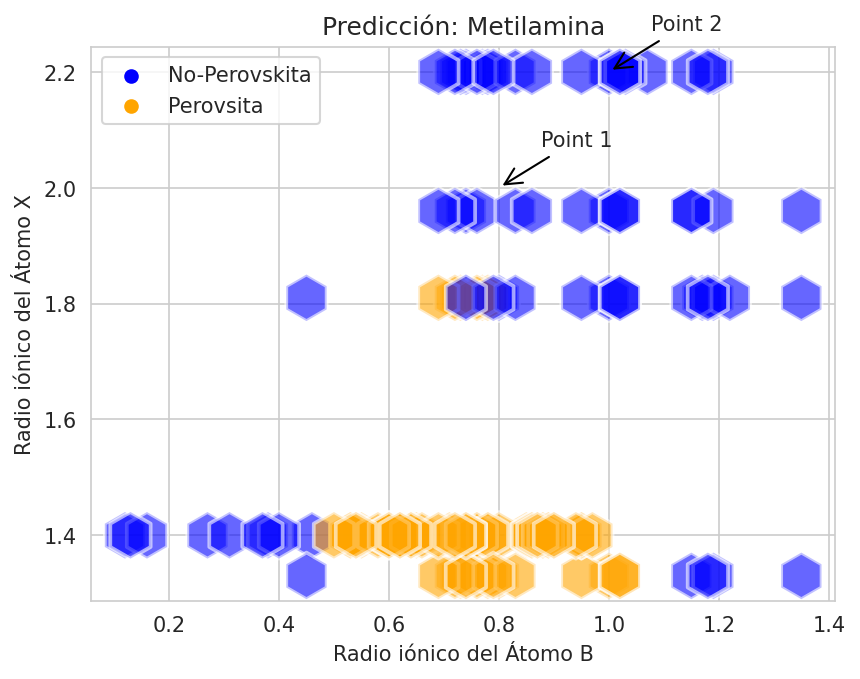

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=150)

new_colors = ['blue', 'orange']
scatter = sns.scatterplot(x='rB (Ang)', y='rX (Ang)', hue='exp_label', data=pred, palette=new_colors,
                          marker='h', s=500, alpha=0.6)

legend_labels = ['No-Perovskita', 'Perovsita']
scatter.legend().set_title('Categories')  # Set the legend title
for t, l in zip(scatter.legend().texts, legend_labels):
    t.set_text(l)

labels = ['Point 1', 'Point 2']
points = [(0.8, 2), (1.0, 2.2)]

for label, point in zip(labels, points):
    plt.annotate(label, point, xytext=(20, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black', mutation_scale=20))

plt.title("Predicción: Metilamina")
plt.xlabel("Radio iónico del Átomo B")
plt.ylabel("Radio iónico del Átomo X")

plt.show()

<ipython-input-65-6e0d178ff04c>:15: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  scatter = sns.scatterplot(x=x, y=y, hue=categories, palette=new_colors,


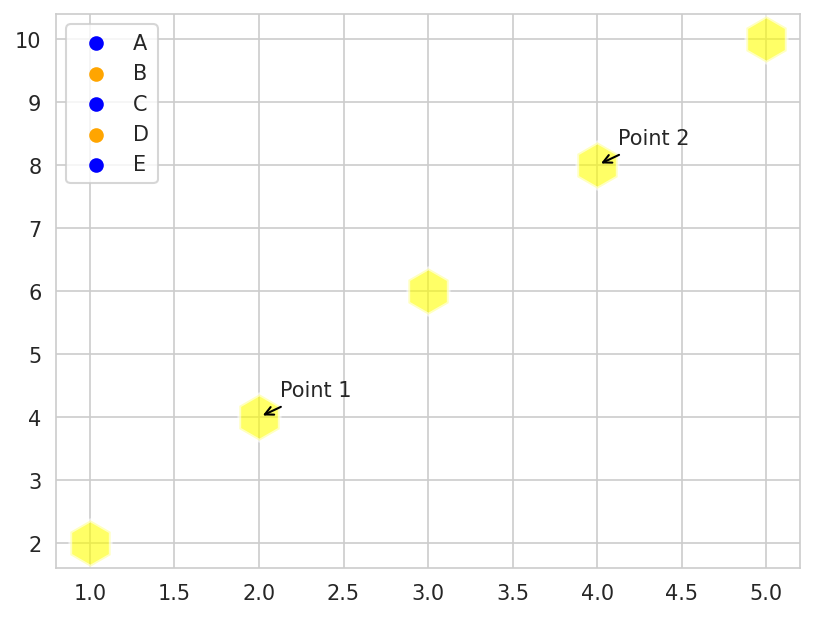

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=150)

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
categories = ['A', 'B', 'C', 'D', 'E']

# Custom colors for each category
new_colors = ['blue', 'orange']

# Create the scatterplot with custom colors
scatter = sns.scatterplot(x=x, y=y, hue=categories, palette=new_colors,
                          marker='h', s=500, alpha=0.6)

# Modify the color of the points
scatter.get_children()[0].set_facecolor('yellow')

# Add labels with arrows to specific points
labels = ['Point 1', 'Point 2']
points = [(2, 4), (4, 8)]

for label, point in zip(labels, points):
    plt.annotate(label, point, xytext=(10, 10), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'))

# Show the plot
plt.show()

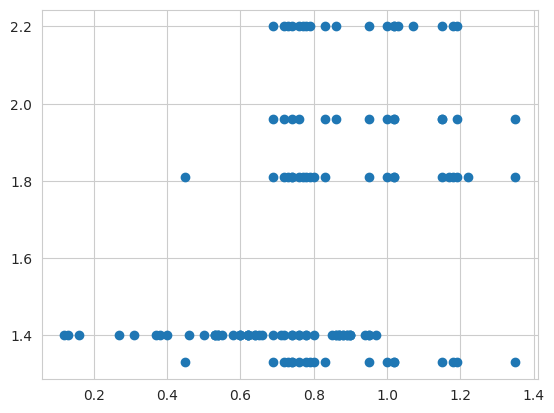

In [ ]:
import matplotlib.pyplot as plt

x = pred["rB (Ang)"]
y = pred["rX (Ang)"]

plt.scatter(x, y)
plt.show()

<Axes: xlabel='rB (Ang)', ylabel='rX (Ang)'>

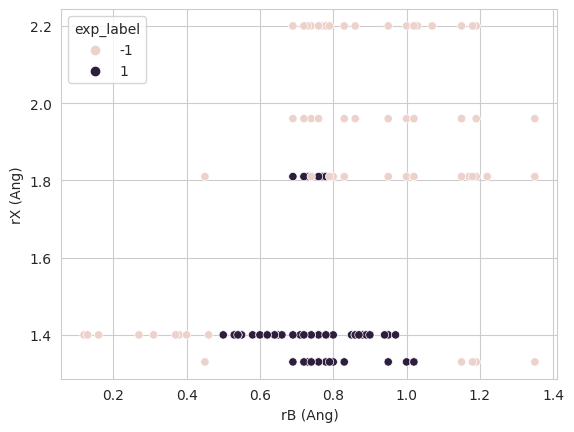

In [ ]:
import seaborn as sns
sns.scatterplot(data=pred, x="rB (Ang)", y="rX (Ang)",hue="exp_label")

In [ ]:
pd.concat([pd.DataFrame(X_train_scaled,columns=['rA (Ang)','rB (Ang)','rX (Ang)']).reset_index(drop=True),pd.DataFrame(y_train).reset_index(drop=True)],axis=1)
# train = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)

In [ ]:
X = df[["rA (Ang)","rB (Ang)","rX (Ang)"]]
y = df["exp_label"]

X_train, X_test, y_train ,y_test = train_test_split(X,y,random_state=101,test_size=0.20)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)

train_scaled = pd.concat([pd.DataFrame(X_train_scaled,columns=['rA (Ang)','rB (Ang)','rX (Ang)']).reset_index(drop=True),pd.DataFrame(y_train).reset_index(drop=True)],axis=1)

scaler = StandardScaler()
moleculas_scaled = scaler.fit_transform(df_Metilamina[['rA','rB','rX']])
moleculas_scaled = pd.DataFrame(moleculas_scaled,columns=['rA','rB','rX'])

sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter(xs=train_scaled[train_scaled["exp_label"] == -1]["rA (Ang)"],
           ys=train_scaled[train_scaled["exp_label"] == -1]["rB (Ang)"],
           zs=train_scaled[train_scaled["exp_label"] == -1]["rX (Ang)"],
           c="black",s=75,alpha=0.5,label="Entrenamiento: No Perovskita",marker='^')

ax.scatter(xs=train_scaled[train_scaled["exp_label"]==1]["rA (Ang)"],
           ys=train_scaled[train_scaled["exp_label"]==1]["rB (Ang)"],
           zs=train_scaled[train_scaled["exp_label"]==1]["rX (Ang)"],
           c="red",s=75,alpha=0.5,label="Entrenamiento: Perovskita",marker='^')

ax.scatter(xs=moleculas_scaled["rA"],
           ys=moleculas_scaled["rB"],
           zs=moleculas_scaled["rX"],
           c="blue",s=150,alpha=0.5,label="Molecula: Metilamina",marker='h')

plt.title("Gráfico de dispersión de los radios átomicos")
ax.set_xlabel("Radio del átomo A")
ax.set_ylabel("Radio del átomo B")
ax.set_zlabel("Radio del átomo X")
ax.legend()
plt.show()